# ML FINAL PROJECT

### Dataset Description

This the Weekly S&P Stock Market Data. It consists of 1089 observations and 9 variables. These variables are Year, Lag1, Lag2, Lag3, Lag4, Lag5, Volume, Today and Direction.

### Objective

Conduct exploratory data analysis on the Weekly dataset, assess patterns, and perform logistic regression with all lag variables and volume for market direction prediction. Evaluate models using confusion matrices, focusing on logistic regression with Lag2, and compare the performance of logistic regression, KNN, and Naive Bayes for market prediction



# Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importing and Displaying Data

In [156]:
file_path = r'C:\Users\onlyc\Downloads\Weekly.csv'

df = pd.read_csv(file_path)

In [157]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [158]:

df.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up
1088,2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up


# Numerical and Graphical Summary

### Numerical Summary

In [159]:

print("Descriptive Statistics:")

df.describe().drop('count')


Descriptive Statistics:


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [160]:

print("Correlation Matrix: ")
df.corr()

Correlation Matrix: 


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


# Graphical Summary

Pair Plot:


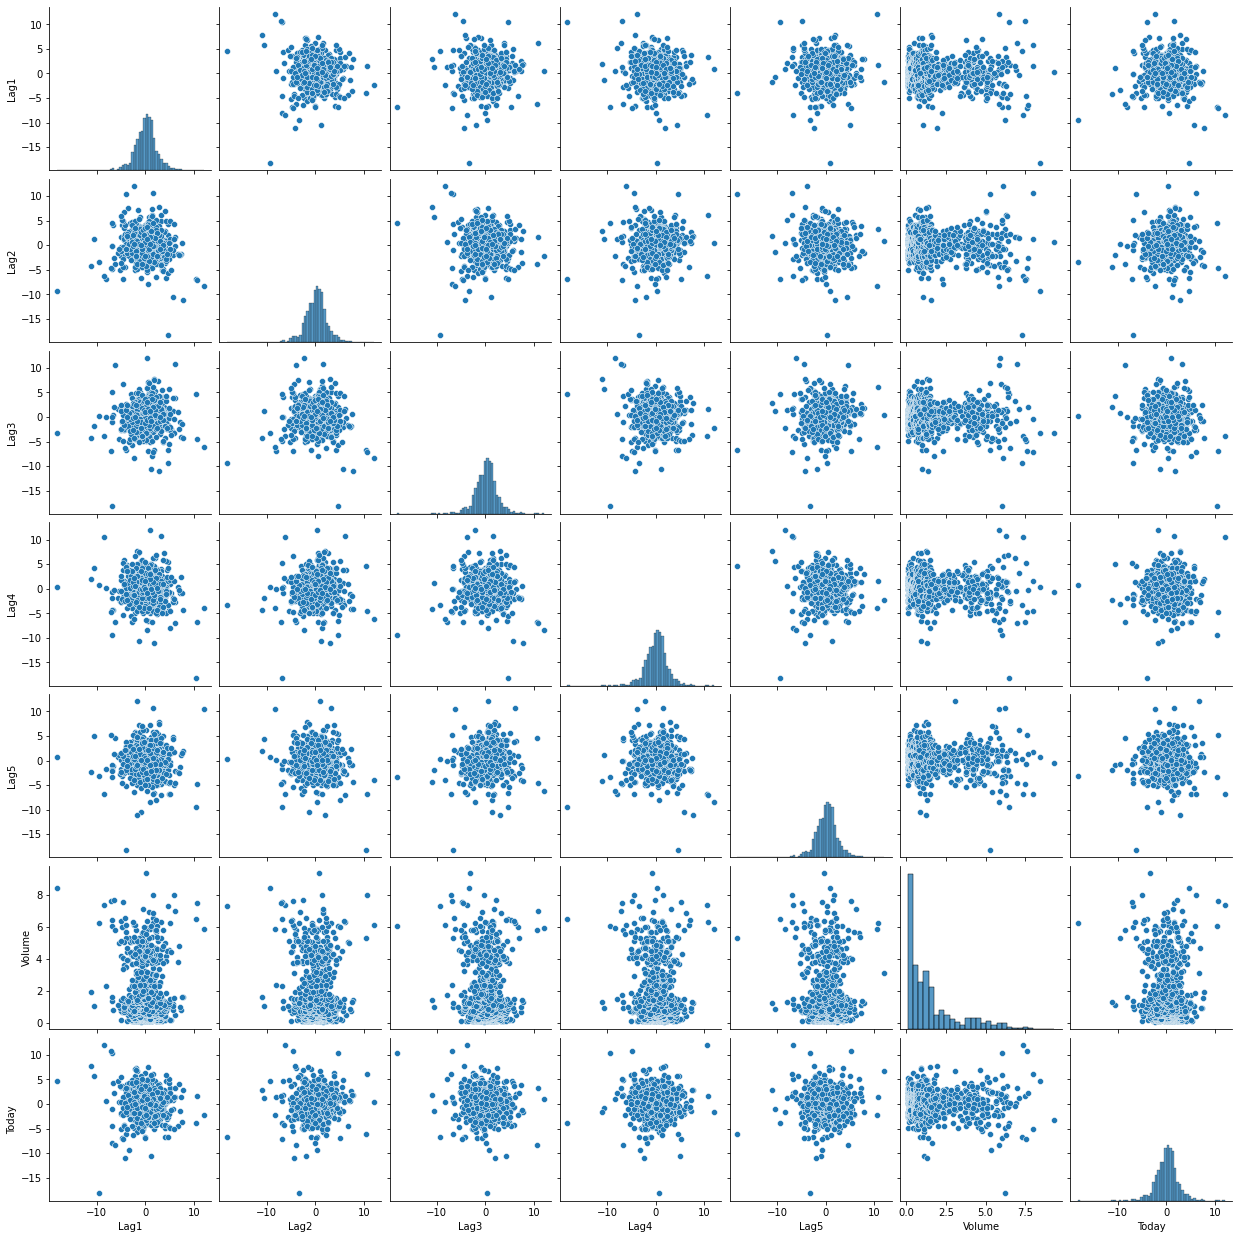

In [161]:

print("Pair Plot:")
sns.pairplot(df, vars=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today'])
plt.show()

Boxplot:


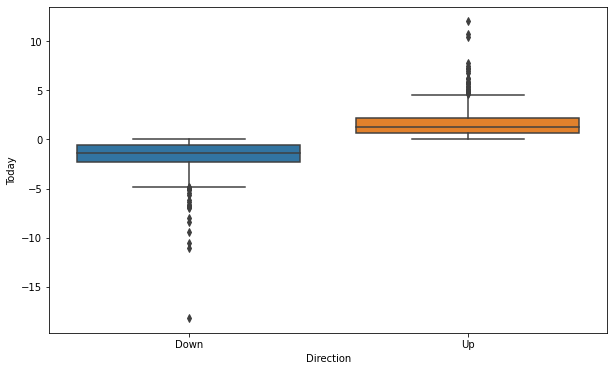

In [162]:

print("Boxplot:")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Direction', y='Today', data=df)
plt.show()

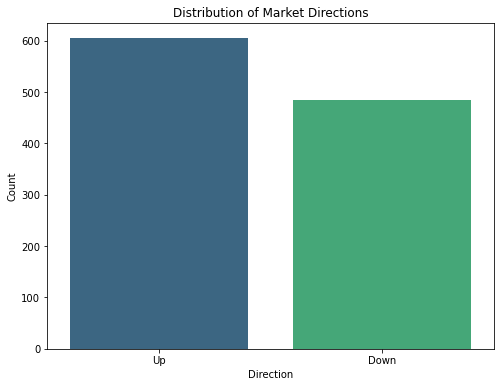

In [163]:

direction_counts = df['Direction'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=direction_counts.index, y=direction_counts.values, palette="viridis")
plt.xlabel('Direction')
plt.ylabel('Count')
plt.title('Distribution of Market Directions')
plt.show()

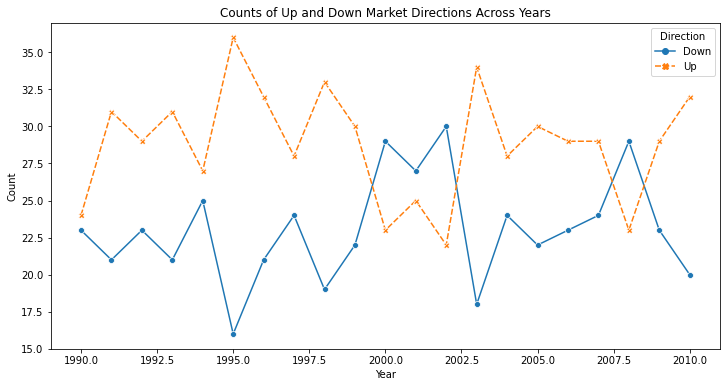

In [164]:

direction_counts_by_year = df.groupby(['Year', 'Direction']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=direction_counts_by_year, markers=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Up and Down Market Directions Across Years')
plt.show()


# ML models

## Logistic Regression (Multiple Predictors)

#### Processing Data (For multiple predictors)

In [215]:
file_path = r'C:\Users\onlyc\Downloads\Weekly.csv'

df = pd.read_csv(file_path)

df['Direction'] = df['Direction'].map({'Down': 0, 'Up': 1})

df['const'] = 1

lag_columns = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
df[lag_columns] = df[lag_columns].apply(pd.to_numeric, errors='coerce')

predictors = ['const'] + lag_columns
response = 'Direction'

X = np.asarray(df[predictors])
y = np.asarray(df[response])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Fitting the model and Statistical Summary

In [219]:
logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.681414
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  871
Model:                          Logit   Df Residuals:                      864
Method:                           MLE   Df Model:                            6
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                 0.01012
Time:                        04:33:39   Log-Likelihood:                -593.51
converged:                       True   LL-Null:                       -599.58
Covariance Type:            nonrobust   LLR p-value:                   0.05910
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2513      0.096      2.620      0.009       0.063       0.439
x1            -0.0656      0.

#### Accuracy and Confusion Matrix


Overall Fraction of Correct Predictions (Accuracy): 53.67%

Confusion Matrix:


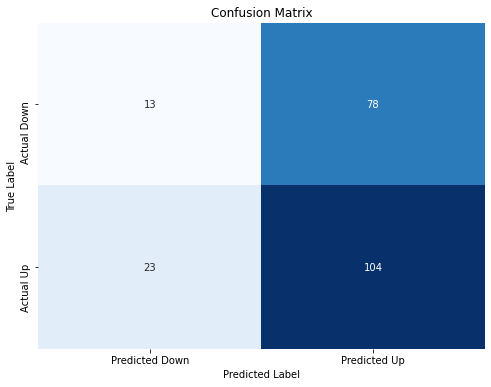

In [218]:

y_pred = result.predict(X_test)
y_pred_binary = np.round(y_pred)


accuracy = accuracy_score(y_test, y_pred_binary)
print(f"\nOverall Fraction of Correct Predictions (Accuracy): {accuracy:.2%}")


conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("\nConfusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Down', 'Predicted Up'],
            yticklabels=['Actual Down', 'Actual Up'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression with a Single Predictor

#### Processing data (for a single predictor)

In [185]:
lag_columns = ['Lag2']
df[lag_columns] = df[lag_columns].apply(pd.to_numeric, errors='coerce')

predictors = ['const'] + lag_columns
response = 'Direction'

X = np.asarray(df[predictors])
y = np.asarray(df[response])

train_data = df[df['Year'] <= 2008]
test_data = df[df['Year'] > 2008]

X_train = np.asarray(train_data[predictors])
y_train = np.asarray(train_data[response])
X_test = np.asarray(test_data[predictors])
y_test = np.asarray(test_data[response])



#### Fitting the Model, Statistical Summary and Confusion Matrix

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                0.003076
Time:                        03:58:20   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
x1             0.0581      0.

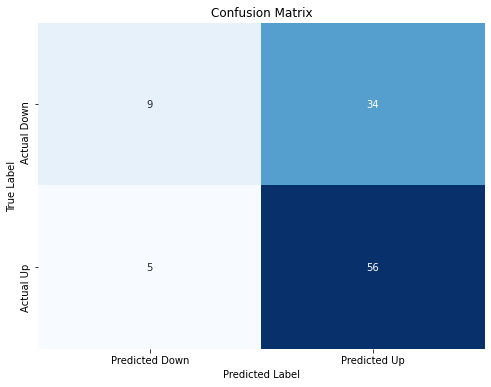

In [184]:
logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()


y_pred = result.predict(X_test)
y_pred_binary = np.round(y_pred)

conf_matrix = confusion_matrix(y_test, y_pred_binary)

accuracy = accuracy_score(y_test, y_pred_binary)

print(result.summary())

print(f"\nOverall Fraction of Correct Predictions (Accuracy): {accuracy:.2%}")

print("\nConfusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Down', 'Predicted Up'],
            yticklabels=['Actual Down', 'Actual Up'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## kNN with 1 neighbor


Overall Fraction of Correct Predictions (Accuracy): 50.00%

Confusion Matrix:


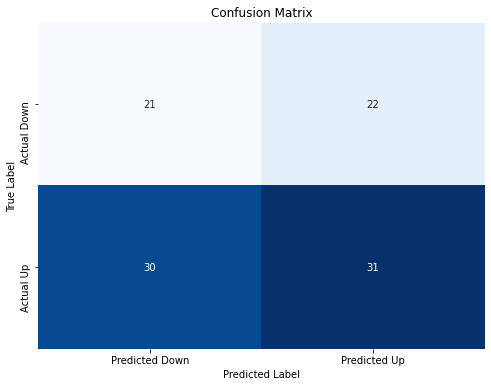

In [178]:
k_neighbors = 1  
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

result = knn_model.fit(X_train, y_train)

y_pred = result.predict(X_test)
y_pred_binary = np.round(y_pred)

conf_matrix = confusion_matrix(y_test, y_pred_binary)

accuracy = accuracy_score(y_test, y_pred_binary)

print(f"\nOverall Fraction of Correct Predictions (Accuracy): {accuracy:.2%}")

print("\nConfusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Down', 'Predicted Up'],
            yticklabels=['Actual Down', 'Actual Up'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Gaussian Naive Bayes


Overall Fraction of Correct Predictions (Accuracy): 58.65%

Confusion Matrix:


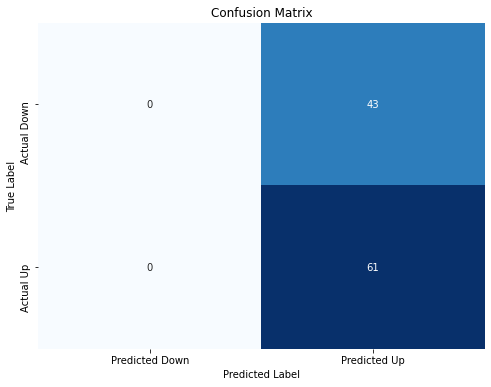

In [169]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
y_pred_binary = np.round(y_pred)

conf_matrix = confusion_matrix(y_test, y_pred_binary)

accuracy = accuracy_score(y_test, y_pred_binary)

print(f"\nOverall Fraction of Correct Predictions (Accuracy): {accuracy:.2%}")

print("\nConfusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Down', 'Predicted Up'],
            yticklabels=['Actual Down', 'Actual Up'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Comparative Analysis of all the models

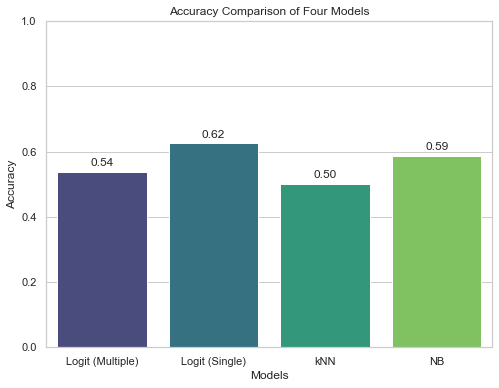

In [4]:
import matplotlib.pyplot as plt

accuracy_values = [0.5367, 0.6250, 0.5, 0.5865]

model_names = ['Logit (Multiple)', 'Logit (Single)', 'kNN', 'NB']

data = pd.DataFrame({'Models': model_names, 'Accuracy': accuracy_values})

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Models', y='Accuracy', data=data, palette='viridis')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Four Models')

plt.ylim(0, 1)  
plt.show()


# Alternate kNN Models

In [3]:
def knn(neighbors, distance):
    knn_model = KNeighborsClassifier(n_neighbors= neighbors, metric = distance)

    result = knn_model.fit(X_train, y_train)

    y_pred = result.predict(X_test)
    y_pred_binary = np.round(y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred_binary)

    accuracy = accuracy_score(y_test, y_pred_binary)

    print(f"\nOverall Fraction of Correct Predictions (Accuracy): {accuracy:.2%}")

    print("\nConfusion Matrix:")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Down', 'Predicted Up'],
                yticklabels=['Actual Down', 'Actual Up'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

values = ["euclidean", "manhattan"]

For 1 neighbor(s) and euclidean distance.

Overall Fraction of Correct Predictions (Accuracy): 50.00%

Confusion Matrix:


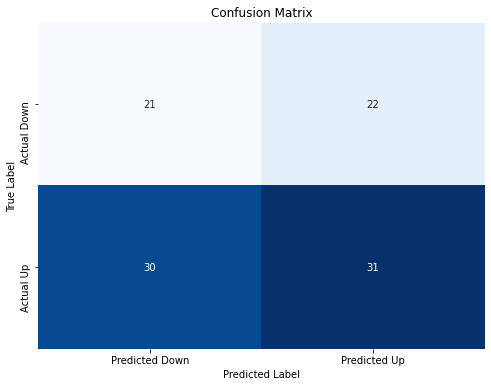

For 1 neighbor(s) and manhattan distance.

Overall Fraction of Correct Predictions (Accuracy): 50.00%

Confusion Matrix:


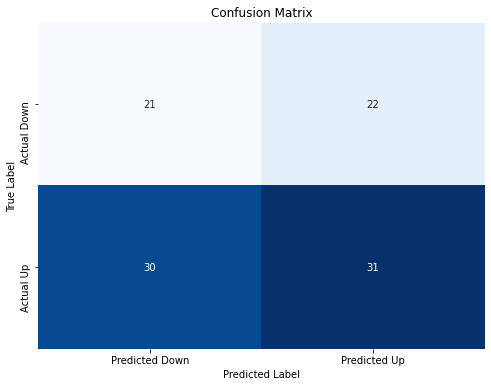

For 3 neighbor(s) and euclidean distance.

Overall Fraction of Correct Predictions (Accuracy): 53.85%

Confusion Matrix:


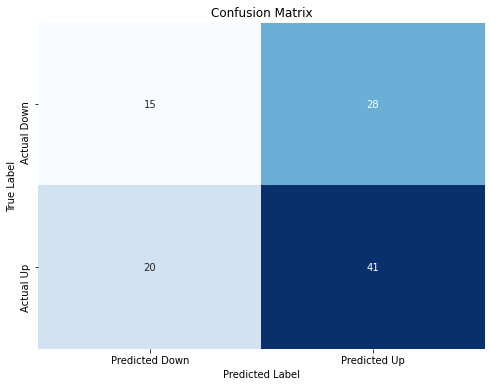

For 3 neighbor(s) and manhattan distance.

Overall Fraction of Correct Predictions (Accuracy): 53.85%

Confusion Matrix:


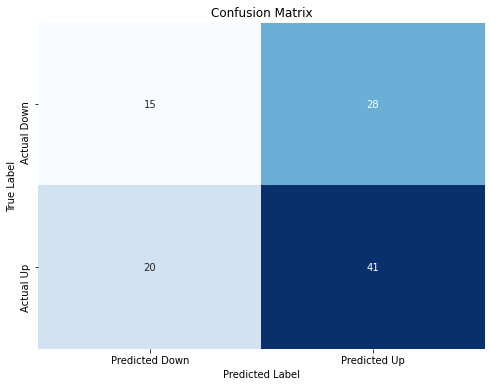

For 5 neighbor(s) and euclidean distance.

Overall Fraction of Correct Predictions (Accuracy): 52.88%

Confusion Matrix:


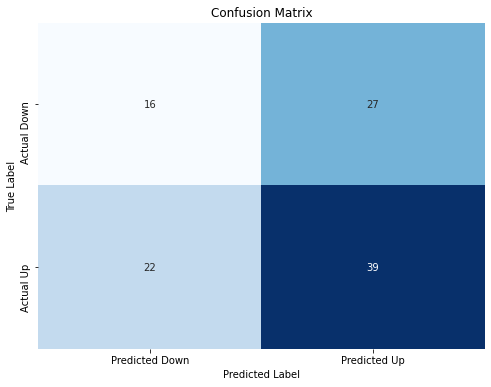

For 5 neighbor(s) and manhattan distance.

Overall Fraction of Correct Predictions (Accuracy): 52.88%

Confusion Matrix:


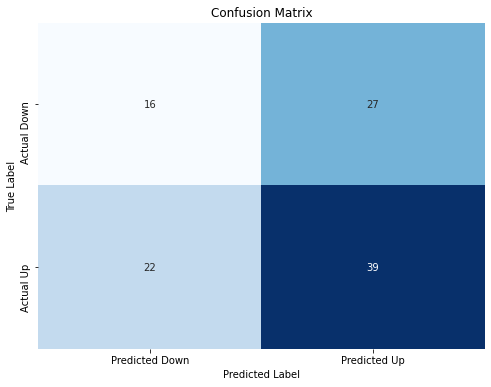

In [214]:
for i in range(1,6,2):
    for j in values:
        
        print("For " + str(i) + " neighbor(s) and " + str(j) + " distance.")
        
        knn(i, j)
        
        

# kNN Comparison

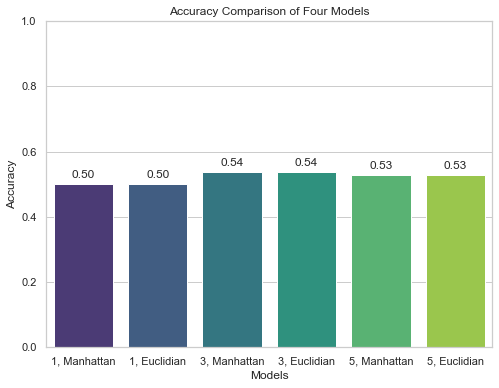

In [225]:
import matplotlib.pyplot as plt

accuracy_values = [0.50, 0.50, 0.5385, 0.5385, 0.5288, 0.5288]

model_names = ['1, Manhattan', '1, Euclidian','3, Manhattan', '3, Euclidian','5, Manhattan', '5, Euclidian']

data = pd.DataFrame({'Models': model_names, 'Accuracy': accuracy_values})

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Models', y='Accuracy', data=data, palette='viridis')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Four Models')

plt.ylim(0, 1) 
plt.show()